<a href="https://colab.research.google.com/github/wlcosta/es235_pdi/blob/master/25_reconhecimento_caracteres/Laborat%C3%B3rio_de_Reconhecimento_de_Caracteres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de caracteres

## OCR usando kNN e OpenCV

Como já é de costume, vamos importar as bibliotecas necessárias

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/digits.png

--2021-07-12 19:32:19--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/digits.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721129 (704K) [image/png]
Saving to: ‘digits.png.1’

digits.png.1        100%[===================>] 704.23K  --.-KB/s    in 0.06s   

2021-07-12 19:32:19 (11.1 MB/s) - ‘digits.png.1’ saved [721129/721129]



Nosso objetivo é criar uma aplicação que consiga ler dígitos manuscritos. Baixamos a imagem `digits.png`, que é uma imagem de exemplo do OpenCV. A imagem contém 5000 dígitos manuscritos (500 casos para cada dígito) com imagens de `20x20 pixels`.

Então, vamos localizar essas regiões com os dígitos e recortá-las para preparar nossos conjuntos de teste e treino (250 para cada).

In [32]:
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

# De acordo com a documentação, cada imagem é de tamanho 20x20. A imagem terá 5000 células.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape) # Deve ser 50, 100, 20, 20

(1000, 2000, 3)
(50, 100, 20, 20)


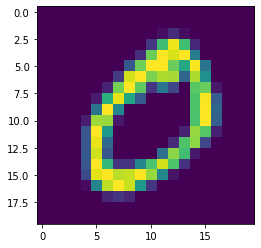

In [33]:
plt.imshow(x[0][0])

Agora, vamos construir os conjuntos de teste e treino. Nesse exemplo, usaremos 50% para cada um.

Você é extremamente encorajado a alterar esses valores e buscar uma melhor taxa de reconhecimento.

In [9]:
train = x[:,:50].reshape(-1,400).astype(np.float32)
test = x[:,50:100].reshape(-1,400).astype(np.float32)
print(train.shape, test.shape)

(2500, 400) (2500, 400)


Vamos gerar nossos labels. Lembrando que para aprendizagem supervisionada, precisamos de um par `(x, y)` de dados.

In [10]:
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()
print(train_labels.shape, train_labels[0], train_labels[-1])

(2500, 1) [0] [9]


Vamos criar nosso modelo e treinar no conjunto de dados.

In [11]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
ret, result, neighbours, dict = knn.findNearest(test, k=5)

Vamos gerar as métricas de acurácia.

In [12]:
matches = result == test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print(accuracy)

91.76


[[0.]]


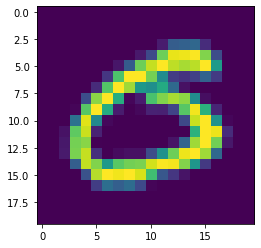

In [35]:
input = x[np.random.randint(0,50)][np.random.randint(50, 100)]
plt.imshow(input)
ret, result, neighbours, dict = knn.findNearest(input.reshape(-1,400).astype(np.float32), k=5)
print(result)

## Abordagem com Tesseract

Vamos instalar o `Pytesseract` e o `tesseract-ocr`.

In [36]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,647 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/font_test.png

In [41]:
import pytesseract
from PIL import Image

In [ ]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/font_test.png
img = Image.open('font_test.png')
ocr = pytesseract.image_to_string(img)

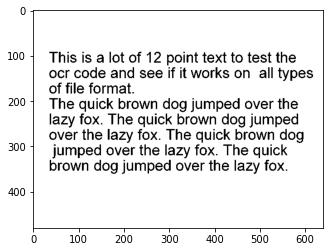

In [43]:
plt.imshow(img)

In [44]:
print(ocr)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [59]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/alice.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/cardapio.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/table.jpg
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/invoice-sample.jpg

--2021-07-12 19:58:49--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/alice.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305886 (299K) [image/jpeg]
Saving to: ‘alice.jpg.1’

alice.jpg.1         100%[===================>] 298.72K  --.-KB/s    in 0.03s   

2021-07-12 19:58:49 (8.53 MB/s) - ‘alice.jpg.1’ saved [305886/305886]

--2021-07-12 19:58:49--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/more_tesseract/cardapio.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41

’ Invoice

Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334

BILL TO:
John Doe

‘Alpha Bravo Road 33

P: 111-222-333, F: 111-222-334
client@example.net

SHIPPING TO:
John Doe Office

Office Road 38,

P: 111-333-222, F: 122-222-834
office@example.net

http://mrsinvoice.com

 

 

 

 

 

Invoice # 00001
Invoice Date 12/12/2001
Name of Rep. Bob

Contact Phone 101-102-103

 

Payment Terms

 

 

Cash on Delivery

 

 

Amount Due: $4,170

 

 

 

 

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE

1 tye 2 $20 $40

2__| Steering Wheel 5 $10 $50

3 | Engine oil 10 $15 $150

4 | Brake Pad 24 $1000 $2,400

Subtotal $275

Tax (10%) $27.5

Grand Total $202.5

‘THANK YOU FOR YOUR BUSINESS



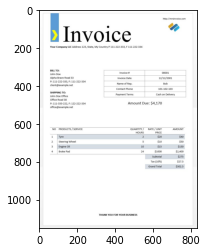

In [60]:
imagem = "invoice-sample" #@param ["alice", "cardapio", "table", "invoice-sample"]
filename = imagem+".jpg"

img = Image.open(filename)
ocr = pytesseract.image_to_string(img)
print(ocr)
plt.imshow(img)

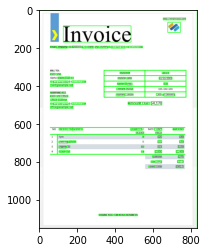

In [63]:
from pytesseract import Output
img = cv2.cvtColor(cv2.imread("invoice-sample.jpg"), cv2.COLOR_BGR2RGB)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img)